In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#test
asdasdNovan Update

## Data Importing

In [2]:
df = pd.read_csv('./datas/ebola.csv')
df.head(10)

,Indicator,Country,Date,value
0,"Cumulative number of confirmed, probable and s...",Guinea,2015-03-10,3285.0
1,Cumulative number of confirmed Ebola cases,Guinea,2015-03-10,2871.0
2,Cumulative number of probable Ebola cases,Guinea,2015-03-10,392.0
3,Cumulative number of suspected Ebola cases,Guinea,2015-03-10,22.0
4,"Cumulative number of confirmed, probable and s...",Guinea,2015-03-10,2170.0
5,Cumulative number of confirmed Ebola deaths,Guinea,2015-03-10,1778.0
6,Cumulative number of probable Ebola deaths,Guinea,2015-03-10,392.0
7,"Cumulative number of confirmed, probable and s...",Liberia,2015-03-10,9343.0
8,Cumulative number of confirmed Ebola cases,Liberia,2015-03-10,3150.0
9,Cumulative number of probable Ebola cases,Liberia,2015-03-10,1879.0


In [3]:
df.tail(10)

,Indicator,Country,Date,value
17575,Cumulative number of suspected Ebola deaths,Senegal,2016-03-23,0.0
17576,"Cumulative number of confirmed, probable and s...",Senegal,2016-03-23,0.0
17577,Cumulative number of confirmed Ebola deaths,Spain,2016-03-23,0.0
17578,Cumulative number of probable Ebola deaths,Spain,2016-03-23,0.0
17579,Cumulative number of suspected Ebola deaths,Spain,2016-03-23,0.0
17580,"Cumulative number of confirmed, probable and s...",Spain,2016-03-23,0.0
17581,Cumulative number of confirmed Ebola deaths,United States of America,2016-03-23,1.0
17582,Cumulative number of probable Ebola deaths,United States of America,2016-03-23,0.0
17583,Cumulative number of suspected Ebola deaths,United States of America,2016-03-23,0.0
17584,"Cumulative number of confirmed, probable and s...",United States of America,2016-03-23,1.0


In [4]:
len(df)

17585

## Data Preprocessing

### 1. Mengecek apakah ada nilai NA didalam tabel tersebut

In [5]:
df.isna().sum()

Indicator    0
Country      0
Date         0
value        0
dtype: int64

##### Tidak terdapat Nilai NA pada tabel tersebut

### 2. Mengecek apakah type data dalam tabel tersebut sudah sesuai

In [6]:
df["Date"] = pd.to_datetime(df["Date"], format = "%Y-%m-%d")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17585 entries, 0 to 17584
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Indicator  17585 non-null  object        
 1   Country    17585 non-null  object        
 2   Date       17585 non-null  datetime64[ns]
 3   value      17585 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 549.7+ KB


#### Type data setiap column sudah sesuai

### 3. Karena Indicator berbeda-beda kita lihat berapa banyak nilai unik dalam kolom tersebut

In [7]:
df["Indicator"].nunique()

36

##### Terdapat 36 nilai unik pada kolom "Indicator"

### 4. Mengetahui indicator mana yang paling banyak digunakan

In [8]:
df["Indicator"].value_counts()

Indicator
Cumulative number of confirmed, probable and suspected Ebola deaths                            2485
Cumulative number of confirmed Ebola cases                                                     2484
Cumulative number of confirmed, probable and suspected Ebola cases                             2477
Cumulative number of probable Ebola cases                                                      2436
Cumulative number of suspected Ebola cases                                                     2366
Cumulative number of confirmed Ebola deaths                                                    1648
Cumulative number of probable Ebola deaths                                                     1526
Cumulative number of suspected Ebola deaths                                                    1308
Number of confirmed Ebola cases in the last 21 days                                             190
Number of confirmed, probable and suspected Ebola cases in the last 21 days               

##### Terdapat urutan-urutan Indikator yang paling sering digunakan sesuai tabel diatas

### 5. Membagi data frame berdasarkan kolom Indicator agar mudah dianalisis

In [9]:
indikator_unik = df["Indicator"].unique()

In [10]:
df1 = df[df["Indicator"] == indikator_unik[0]]
df2 = df[df["Indicator"] == indikator_unik[1]]
df3 = df[df["Indicator"] == indikator_unik[2]]
df4 = df[df["Indicator"] == indikator_unik[3]]
df5 = df[df["Indicator"] == indikator_unik[4]]
df6 = df[df["Indicator"] == indikator_unik[5]]
df7 = df[df["Indicator"] == indikator_unik[6]]
df8 = df[df["Indicator"] == indikator_unik[7]]
df9 = df[df["Indicator"] == indikator_unik[8]]
df10 = df[df["Indicator"] == indikator_unik[9]]
df11 = df[df["Indicator"] == indikator_unik[10]]
df12 = df[df["Indicator"] == indikator_unik[11]]
df13 = df[df["Indicator"] == indikator_unik[12]]
df14 = df[df["Indicator"] == indikator_unik[13]]
df15 = df[df["Indicator"] == indikator_unik[14]]
df16 = df[df["Indicator"] == indikator_unik[15]]
df17 = df[df["Indicator"] == indikator_unik[16]]
df18 = df[df["Indicator"] == indikator_unik[17]]
df19 = df[df["Indicator"] == indikator_unik[18]]
df20 = df[df["Indicator"] == indikator_unik[19]]
df21 = df[df["Indicator"] == indikator_unik[20]]
df22 = df[df["Indicator"] == indikator_unik[21]]
df23 = df[df["Indicator"] == indikator_unik[22]]
df24 = df[df["Indicator"] == indikator_unik[23]]
df25 = df[df["Indicator"] == indikator_unik[24]]
df26 = df[df["Indicator"] == indikator_unik[25]]
df27 = df[df["Indicator"] == indikator_unik[26]]
df28 = df[df["Indicator"] == indikator_unik[27]]
df29 = df[df["Indicator"] == indikator_unik[28]]
df30 = df[df["Indicator"] == indikator_unik[29]]
df31 = df[df["Indicator"] == indikator_unik[30]]
df32 = df[df["Indicator"] == indikator_unik[31]]
df33 = df[df["Indicator"] == indikator_unik[32]]
df34 = df[df["Indicator"] == indikator_unik[33]]
df35 = df[df["Indicator"] == indikator_unik[34]]
df36 = df[df["Indicator"] == indikator_unik[35]]

##### Dikarenakan nilai unik pada kolom "Indicator" sangat banyak, disini kami memutuskan untuk menggunakan indikator yang pasti-pasti saja seperti "Cumulative number of confirmed Ebola cases" dan "Cumulative number of confirmed Ebola deaths"

## Preprocessing untuk "Cumulative number of confirmed Ebola cases"

### 1. Melihat nilai unik dari kolom "Date" dan mengecek negara mana yang mmemiliki timestamps paling pengkap

In [11]:
df2["Date"].nunique()

259

In [12]:
df2["Country"].value_counts()

Country
Guinea                      259
Sierra Leone                259
Liberia                     258
Nigeria                     255
Senegal                     254
United States of America    245
Mali                        243
Spain                       243
United Kingdom              221
Italy                       141
Liberia 2                   105
Guinea 2                      1
Name: count, dtype: int64

##### Disini saya memiliki negara Guinea untuk saya eksplorasi

In [13]:
df2_Guinea = df2[df2["Country"] == "Guinea"]
df2_Guinea.drop(columns=["Indicator", "Country"], inplace=True)
df2_Guinea = df2_Guinea.sort_values("Date")
df2_Guinea

,Date,value
5086,2014-08-29,482.0
4960,2014-09-05,604.0
4846,2014-09-08,664.0
4746,2014-09-12,678.0
4648,2014-09-16,743.0
...,...,...
17223,2015-12-17,3351.0
17292,2015-12-22,3351.0
17365,2015-12-23,3351.0
17449,2015-12-29,3351.0


In [14]:
df2_Guinea["shift"] = df2_Guinea["value"].shift()
df2_Guinea["Value"] = df2_Guinea["value"] - df2_Guinea["shift"]
df2_Guinea

,Date,value,shift,Value
5086,2014-08-29,482.0,NaN,NaN
4960,2014-09-05,604.0,482.0,122.0
4846,2014-09-08,664.0,604.0,60.0
4746,2014-09-12,678.0,664.0,14.0
4648,2014-09-16,743.0,678.0,65.0
...,...,...,...,...
17223,2015-12-17,3351.0,3351.0,0.0
17292,2015-12-22,3351.0,3351.0,0.0
17365,2015-12-23,3351.0,3351.0,0.0
17449,2015-12-29,3351.0,3351.0,0.0


In [15]:
df2_Guinea[df2_Guinea["Value"] < 0]

,Date,value,shift,Value
7416,2015-05-13,3173.0,3174.0,-1.0
9110,2015-06-17,3245.0,3249.0,-4.0


In [16]:
start = df2_Guinea["Date"].min()
end = df2_Guinea["Date"].max()

print(start)
print(end)

2014-08-29 00:00:00
2016-03-23 00:00:00


In [17]:
df2_Guinea["Date"].duplicated().sum()

0

In [18]:
timestamps = np.arange(start, end + np.timedelta64(1, 'D'), dtype='datetime64[D]')
timestamps

array(['2014-08-29', '2014-08-30', '2014-08-31', '2014-09-01',
       '2014-09-02', '2014-09-03', '2014-09-04', '2014-09-05',
       '2014-09-06', '2014-09-07', '2014-09-08', '2014-09-09',
       '2014-09-10', '2014-09-11', '2014-09-12', '2014-09-13',
       '2014-09-14', '2014-09-15', '2014-09-16', '2014-09-17',
       '2014-09-18', '2014-09-19', '2014-09-20', '2014-09-21',
       '2014-09-22', '2014-09-23', '2014-09-24', '2014-09-25',
       '2014-09-26', '2014-09-27', '2014-09-28', '2014-09-29',
       '2014-09-30', '2014-10-01', '2014-10-02', '2014-10-03',
       '2014-10-04', '2014-10-05', '2014-10-06', '2014-10-07',
       '2014-10-08', '2014-10-09', '2014-10-10', '2014-10-11',
       '2014-10-12', '2014-10-13', '2014-10-14', '2014-10-15',
       '2014-10-16', '2014-10-17', '2014-10-18', '2014-10-19',
       '2014-10-20', '2014-10-21', '2014-10-22', '2014-10-23',
       '2014-10-24', '2014-10-25', '2014-10-26', '2014-10-27',
       '2014-10-28', '2014-10-29', '2014-10-30', '2014-

In [19]:
print(len(df2_Guinea))
print(len(timestamps))

259
573


In [20]:
df_waktu = pd.DataFrame({
    "Date" : timestamps
})

df2_Guinea = pd.merge(df_waktu, df2_Guinea, on="Date", how="left")

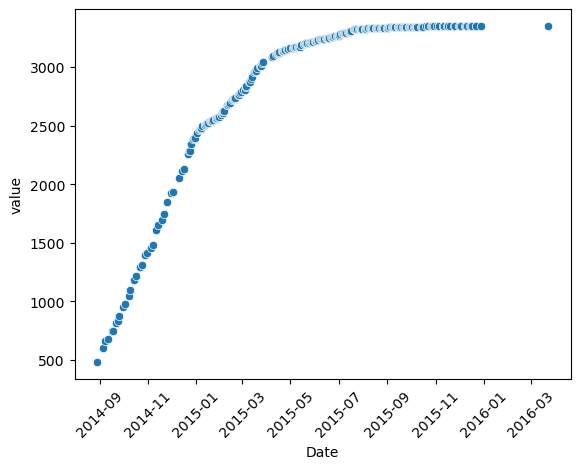

In [21]:
df2_Guinea.set_index("Date", inplace=True)
sns.scatterplot(df2_Guinea["value"])
plt.xticks(rotation=45)
plt.show()

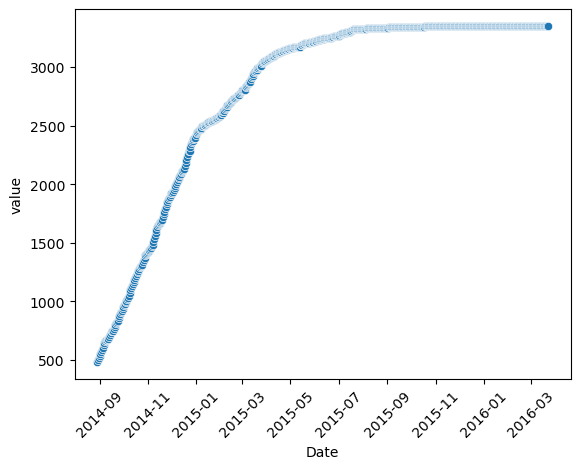

In [22]:
df2_Guinea.interpolate(method="linear", inplace=True)
df2_Guinea["value"] = df2_Guinea["value"].round(0)
sns.scatterplot(df2_Guinea["value"])
plt.xticks(rotation=45)
plt.show()

In [23]:
df2_Guinea["shift"] = df2_Guinea["value"].shift()
df2_Guinea["Value"] = df2_Guinea["value"] - df2_Guinea["shift"]
df2_Guinea

,value,shift,Value
Date,,,
2014-08-29,482.0,NaN,NaN
2014-08-30,499.0,482.0,17.0
2014-08-31,517.0,499.0,18.0
2014-09-01,534.0,517.0,17.0
2014-09-02,552.0,534.0,18.0
...,...,...,...
2016-03-19,3351.0,3351.0,0.0
2016-03-20,3351.0,3351.0,0.0
2016-03-21,3351.0,3351.0,0.0


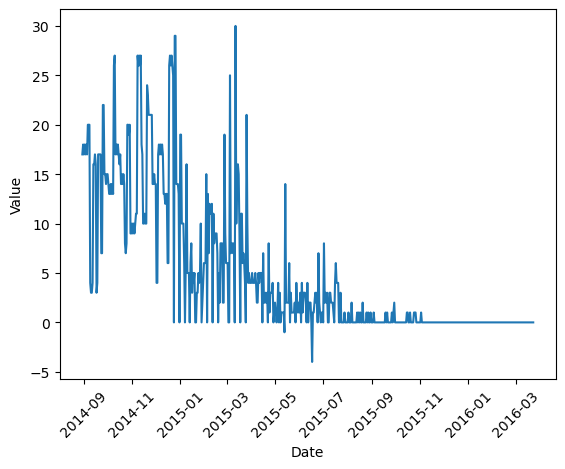

In [24]:
sns.lineplot(df2_Guinea["Value"])
plt.xticks(rotation=45)
plt.show()

In [25]:
len(df2_Guinea)

573

In [26]:
df6_Guinea = df5[df5["Country"] == "Guinea"]
df6_Guinea.drop(columns=["Indicator", "Country"], inplace=True)
df6_Guinea = df6_Guinea.sort_values("Date")
df6_Guinea

,Date,value
5137,2014-08-29,430.0
5017,2014-09-05,517.0
4908,2014-09-08,555.0
4809,2014-09-12,557.0
4709,2014-09-16,595.0
...,...,...
17212,2015-12-17,2536.0
17302,2015-12-22,2536.0
17356,2015-12-23,2536.0
17445,2015-12-29,2536.0


In [27]:
df6_Guinea["shift"] = df6_Guinea["value"].shift()
df6_Guinea["Value"] = df6_Guinea["value"] - df6_Guinea["shift"]
df6_Guinea

,Date,value,shift,Value
5137,2014-08-29,430.0,NaN,NaN
5017,2014-09-05,517.0,430.0,87.0
4908,2014-09-08,555.0,517.0,38.0
4809,2014-09-12,557.0,555.0,2.0
4709,2014-09-16,595.0,557.0,38.0
...,...,...,...,...
17212,2015-12-17,2536.0,2536.0,0.0
17302,2015-12-22,2536.0,2536.0,0.0
17356,2015-12-23,2536.0,2536.0,0.0
17445,2015-12-29,2536.0,2536.0,0.0


In [28]:
df6_Guinea[df6_Guinea["Value"] < 0]

,Date,value,shift,Value
7411,2015-05-13,2391.0,2392.0,-1.0


In [29]:
start = df6_Guinea["Date"].min()
end = df6_Guinea["Date"].max()

print(start)
print(end)

2014-08-29 00:00:00
2016-03-23 00:00:00


In [30]:
df6_Guinea["Date"].duplicated().sum()

0

In [31]:
df6_Guinea.head()

,Date,value,shift,Value
5137,2014-08-29,430.0,NaN,NaN
5017,2014-09-05,517.0,430.0,87.0
4908,2014-09-08,555.0,517.0,38.0
4809,2014-09-12,557.0,555.0,2.0
4709,2014-09-16,595.0,557.0,38.0


In [32]:
timestamps = np.arange(start, end + np.timedelta64(1, 'D'), dtype='datetime64[D]')
timestamps

array(['2014-08-29', '2014-08-30', '2014-08-31', '2014-09-01',
       '2014-09-02', '2014-09-03', '2014-09-04', '2014-09-05',
       '2014-09-06', '2014-09-07', '2014-09-08', '2014-09-09',
       '2014-09-10', '2014-09-11', '2014-09-12', '2014-09-13',
       '2014-09-14', '2014-09-15', '2014-09-16', '2014-09-17',
       '2014-09-18', '2014-09-19', '2014-09-20', '2014-09-21',
       '2014-09-22', '2014-09-23', '2014-09-24', '2014-09-25',
       '2014-09-26', '2014-09-27', '2014-09-28', '2014-09-29',
       '2014-09-30', '2014-10-01', '2014-10-02', '2014-10-03',
       '2014-10-04', '2014-10-05', '2014-10-06', '2014-10-07',
       '2014-10-08', '2014-10-09', '2014-10-10', '2014-10-11',
       '2014-10-12', '2014-10-13', '2014-10-14', '2014-10-15',
       '2014-10-16', '2014-10-17', '2014-10-18', '2014-10-19',
       '2014-10-20', '2014-10-21', '2014-10-22', '2014-10-23',
       '2014-10-24', '2014-10-25', '2014-10-26', '2014-10-27',
       '2014-10-28', '2014-10-29', '2014-10-30', '2014-

In [33]:
df_waktu = pd.DataFrame({
    "Date" : timestamps
})

df6_Guinea = pd.merge(df_waktu, df6_Guinea, on="Date", how="left")

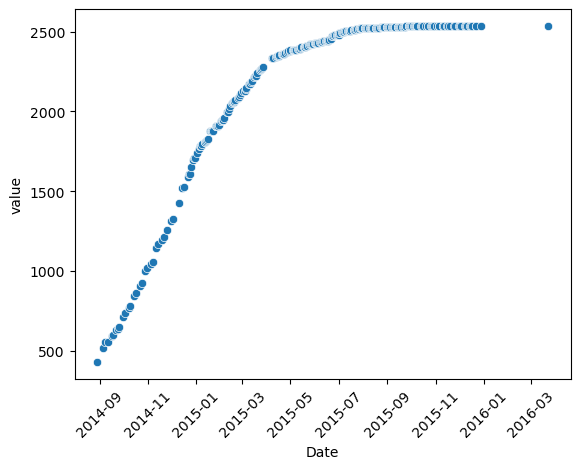

In [34]:
df6_Guinea.set_index("Date", inplace=True)
sns.scatterplot(df6_Guinea["value"])
plt.xticks(rotation=45)
plt.show()

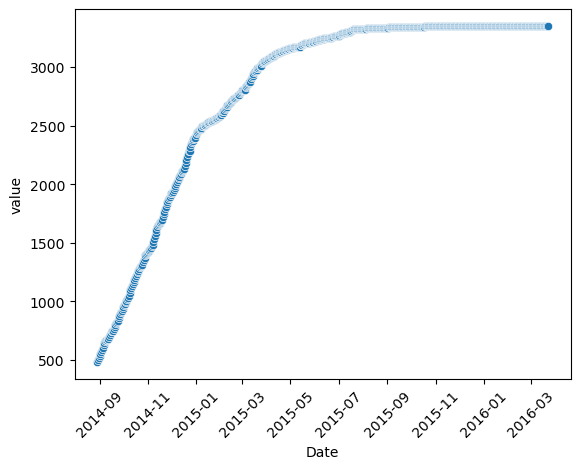

In [35]:
df2_Guinea.interpolate(method="linear", inplace=True)
df2_Guinea["value"] = df2_Guinea["value"].round(0)
sns.scatterplot(df2_Guinea["value"])
plt.xticks(rotation=45)
plt.show()

In [36]:
df6_Guinea["shift"] = df6_Guinea["value"].shift()
df6_Guinea["Value"] = df6_Guinea["value"] - df6_Guinea["shift"]
df6_Guinea

,value,shift,Value
Date,,,
2014-08-29,430.0,NaN,NaN
2014-08-30,NaN,430.0,NaN
2014-08-31,NaN,NaN,NaN
2014-09-01,NaN,NaN,NaN
2014-09-02,NaN,NaN,NaN
...,...,...,...
2016-03-19,NaN,NaN,NaN
2016-03-20,NaN,NaN,NaN
2016-03-21,NaN,NaN,NaN


In [37]:
df6_Guinea[df6_Guinea["Value"] < 0]

,value,shift,Value
Date,,,
2015-05-13,2391.0,2392.0,-1.0


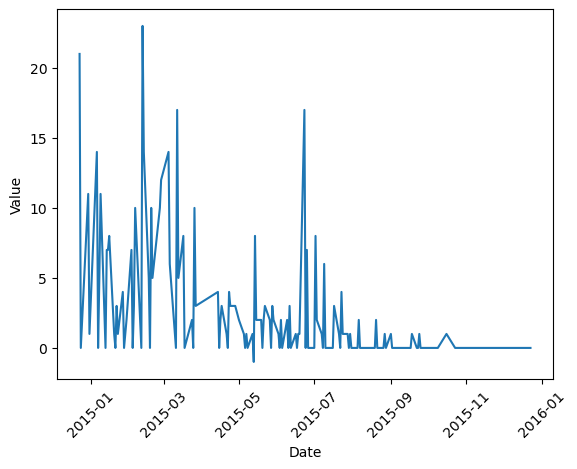

In [38]:
sns.lineplot(df6_Guinea["Value"])
plt.xticks(rotation=45)
plt.show()

In [42]:
sorted_df6 = df6_Guinea["Value"].sort_values(ascending=False)
top_5 = sorted_df6.head(10)
top_5 = pd.DataFrame(top_5).reset_index()
top_5['Date'] = pd.to_datetime(top_5["Date"], format = "%Y-%m-%d")
top_5

,Date,Value
0,2015-02-12,23.0
1,2014-12-23,21.0
2,2015-03-12,17.0
3,2015-06-23,17.0
4,2015-01-06,14.0
5,2015-02-13,14.0
6,2015-03-05,14.0
7,2015-02-27,12.0
8,2014-12-30,11.0
9,2015-01-09,11.0


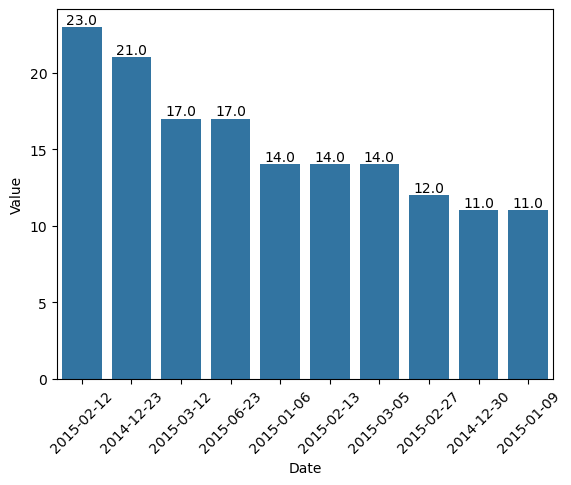

In [43]:
ax = sns.barplot(x=top_5['Date'], y=top_5['Value'])
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')

plt.show()

In [48]:
date_range = df.groupby('Country')['Date'].agg(['min', 'max']).reset_index()
date_range

,Country,min,max
0,Guinea,2014-08-29,2016-03-23
1,Guinea 2,2016-03-23,2016-03-23
2,Italy,2015-05-14,2016-03-23
3,Liberia,2014-08-29,2016-03-23
4,Liberia 2,2015-07-03,2016-03-23
5,Mali,2014-10-25,2016-03-23
6,Nigeria,2014-08-29,2016-03-23
7,Senegal,2014-09-05,2016-03-23
8,Sierra Leone,2014-08-29,2016-03-23
9,Spain,2014-10-10,2016-03-23


In [51]:
max_min = date_range['min'].max()
min_max = date_range['max'].min()

In [55]:
filtered_df = df[(df['Date'] >= max_min) & (df['Date'] <= min_max)]
result = filtered_df.groupby('Country')['value'].sum().reset_index()
top_10 = result.head(10)

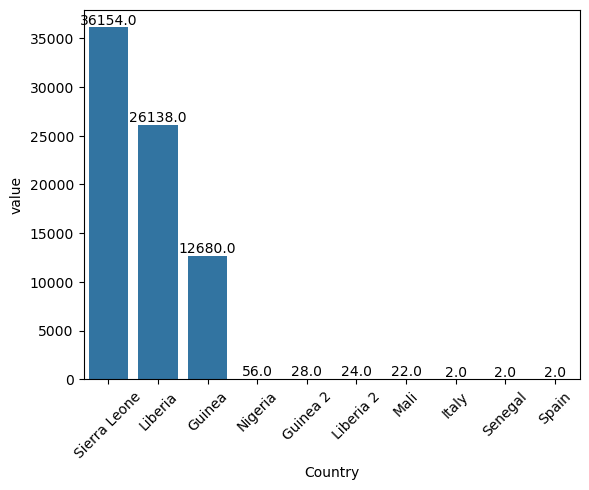

In [61]:
top_10_sorted = top_10.sort_values(by='value', ascending=False)

ax = sns.barplot(x=top_10_sorted['Country'], y=top_10_sorted['value'])
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')

plt.show()